<a href="https://colab.research.google.com/github/jrebull/NLP/blob/main/Team18_MNA_NLP_semana_5_Actividad_Embeddings_2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ✨ **Actividad 3** ✨
#   **5.2: Explorando Vectores Embebidos con OpenAI**
## _Análisis Continuado de Datasets: Amazon, Yelp & IMDb - Semana 5 y 6_

---
---

## 🗓️ **Información General**
> **Fecha de Entrega:** Lunes, 26 de Mayo de 2025
>
> **Versión del Documento:** `vFinal 3`

---
---

## 👥 **Autores del Proyecto**

> #### 🙅🏼‍♀️ **Iris Monserrat Urbina Casas** `A01795999`
>
> #### 🙆🏼‍♂️ **Javier Augusto Rebull Saucedo** `A01795838`
>
> #### 🙆🏼‍♂️ **Juan Carlos Pérez Nava** `A01795941`
>
> #### 🙅🏼‍♀️ **Sihiní Trinidad Sánchez** `A00889358`

---
---

## 👨‍🏫 **Supervisión Académica**
> **Profesor Tutor:**
>
> Dr. Rodolfo Miguel Gameros Leal

> **Profesor Titular:**
>
> Dr. Luis Eduardo Falcón Morales

---
---

# **Maestría en Inteligencia Artificial Aplicada**

## Curso: **Procesamiento de Lenguaje Natural**

### Tecnológico de Monterrey

### Prof Luis Eduardo Falcón Morales

## Actividad Semana 5 y Semana 6

### **Vectores Embebidos de OpenAI**

---


## 💡 Introducción

En la actividad de esta semana, trabajarás en equipos con el modelo de **vectores embebidos** de OpenAI.

Los actuales **Modelos de Lenguaje de Gran Escala (LLM)** son capaces de generar vectores embebidos para cada token, palabra o enunciado que les proporciones. Es crucial considerar que el **coste computacional** y de uso de **recursos** será un factor determinante al elegir qué modelo o aproximación utilizar.

Una forma inicial de trabajar con estos modelos preentrenados implica los siguientes pasos:

> 1.  Generar un **vocabulario** a partir de tu conjunto de datos de entrenamiento.
> 2.  Posteriormente, cada palabra de tu vocabulario se sustituye por su correspondiente **vector embebido** preentrenado.
> 3.  De manera predeterminada, cuando no exista un vector para una palabra en particular, se suele elegir el vector más cercano en términos de **similaridad coseno**, o bien, se puede optar por eliminar dicha palabra del análisis.

Existen diversas propuestas para utilizar estos **vectores embebidos** como entrada para modelos de aprendizaje automático. Cuando se trabaja con los vectores embebidos de cada palabra o token individual, una forma común de representar un enunciado completo es calculando el **vector promedio** de todos los vectores embebidos que lo componen.

🎯 En esta actividad, el objetivo principal será comparar el rendimiento de diferentes modelos de **aprendizaje automático** (machine learning) cuando se utilizan:
    * Vectores embebidos a nivel de palabra (promediados por enunciado).
    * Vectores embebidos aplicados directamente a los comentarios completos.

---

## 📖 Marco Teórico: Vectores Embebidos y Modelos de Lenguaje para el Análisis de Texto

El análisis de sentimientos y la clasificación de texto son tareas fundamentales en el **Procesamiento de Lenguaje Natural (PNL)**, con aplicaciones que van desde la comprensión de la opinión del cliente hasta la moderación de contenido. Tradicionalmente, se han utilizado enfoques basados en la frecuencia de palabras como **TF-IDF** (en inglés, Term Frequency-Inverse Document Frequency). Sin embargo, estos métodos a menudo no capturan las relaciones semánticas matizadas entre palabras (Aggarwal, 2018).

### Vectores Embebidos de Palabras (Word Embeddings)

Los **vectores embebidos de palabras** (word embeddings) han representado un avance al mapear palabras o frases de un vocabulario a vectores de números reales en un espacio de baja dimensión. Estos vectores están entrenados de tal manera que las palabras con significados similares se encuentran cerca en el espacio vectorial, permitiendo a los modelos capturar el contexto y la semántica (Mikolov et al., 2013a; Pennington et al., 2014). Modelos como **Word2Vec** (Mikolov et al., 2013a) y **GloVe** (Pennington et al., 2014) fueron pioneros en esta área, entrenando estos vectores a partir de grandes corpus de texto.

Una técnica común para representar un documento o enunciado a partir de los vectores embebidos de sus palabras es calcular el **vector promedio** de los vectores de todas las palabras que lo componen. Si bien es un método simple, ha demostrado ser una línea base robusta para diversas tareas de PNL (Aggarwal, 2018).

### Modelos de Lenguaje de Gran Escala (LLMs) y Embeddings Contextuales

Más recientemente, los **Modelos de Lenguaje de Gran Escala (LLMs)**, basados en la arquitectura **Transformer** (Vaswani et al., 2017), como los modelos de **OpenAI** (por ejemplo, la familia GPT), han llevado los embeddings a un nuevo nivel. Estos modelos pueden generar **embeddings contextuales**, lo que significa que la representación vectorial de una palabra puede cambiar según el contexto en el que aparece. Esto contrasta con los embeddings estáticos como Word2Vec, donde cada palabra tiene una única representación vectorial.

Los LLMs pueden generar embeddings para tokens, palabras individuales o enunciados completos. La elección del modelo y la granularidad del embedding (palabra vs. enunciado) pueden tener un impacto significativo en el rendimiento y el costo computacional (OpenAI, 2023). En esta actividad, se explorará el uso de los embeddings proporcionados por OpenAI para la tarea de clasificación de texto.

### Aplicación en Aprendizaje Automático

Una vez que el texto se convierte en representaciones vectoriales numéricas mediante embeddings, se pueden utilizar diversos algoritmos de **aprendizaje automático supervisado** para la clasificación. Modelos como la **regresión logística** y los **bosques aleatorios (random forests)** son opciones comunes y efectivas para este tipo de tareas, proporcionando un buen equilibrio entre interpretabilidad y rendimiento (James et al., 2013). La evaluación de estos modelos se realiza comúnmente utilizando métricas como la **exactitud (accuracy)** y el **reporte de clasificación**, que incluye precisión, recall y F1-score por clase.

---
---
# Definicion de librerias

In [ ]:
# -------------------------------------------
# INSTALACIÓN DE PAQUETES EXTERNOS
# -------------------------------------------
!pip install contractions # Instala la librería 'contractions' para expandir contracciones del inglés (e.g., "don't" -> "do not").

# -------------------------------------------
# MANEJO Y ANÁLISIS DE DATOS
# -------------------------------------------
import pandas as pd # Librería fundamental para la manipulación y análisis de datos, usa estructuras como DataFrames.
import numpy as np  # Proporciona soporte para vectores y matrices grandes, junto con funciones matemáticas de alto nivel para operar con ellos.
import gdown        # Útil para descargar archivos directamente desde Google Drive.

# -------------------------------------------
# PROCESAMIENTO DE LENGUAJE NATURAL (NLP)
# -------------------------------------------
import re           # Módulo para trabajar con expresiones regulares, esencial para la limpieza y búsqueda de patrones en texto.
import contractions # Librería para expandir contracciones comunes en el idioma inglés (e.g., "I'm" -> "I am").
import nltk         # Natural Language Toolkit (NLTK), una de las bibliotecas más completas para tareas de NLP.

# Descarga de recursos específicos de NLTK (solo se necesita ejecutar una vez por entorno)
nltk.download('stopwords', quiet=True) # Descarga la lista de palabras vacías (stopwords) para varios idiomas.
nltk.download('wordnet', quiet=True)   # Descarga WordNet, una gran base de datos léxica del inglés, útil para lematización y sinónimos.
nltk.download('punkt', quiet=True)     # Descarga el tokenizador 'punkt', necesario para dividir texto en frases y palabras.

from nltk.corpus import stopwords       # Módulo para acceder a listas de palabras vacías (artículos, preposiciones, etc.).
from nltk.corpus import wordnet         # Módulo para interactuar con la base de datos léxica WordNet.
from nltk.stem import WordNetLemmatizer # Herramienta para realizar la lematización, reduciendo palabras a su forma base o lema.

# -------------------------------------------
# MACHINE LEARNING Y EVALUACIÓN DE MODELOS
# -------------------------------------------
from sklearn.model_selection import train_test_split # Función para dividir conjuntos de datos en subconjuntos de entrenamiento y prueba.
from sklearn.linear_model import LogisticRegression  # Implementa el algoritmo de Regresión Logística para clasificación.
from sklearn.ensemble import RandomForestClassifier  # Implementa el algoritmo de Bosques Aleatorios (Random Forest) para clasificación.
from sklearn.metrics import confusion_matrix         # Calcula la matriz de confusión para evaluar el rendimiento de un modelo de clasificación.
from sklearn.metrics import classification_report    # Genera un reporte con las principales métricas de clasificación (precisión, recall, F1-score).

# -------------------------------------------
# UTILIDADES ESTÁNDAR DE PYTHON Y COLECCIONES
# -------------------------------------------
import os                       # Proporciona funciones para interactuar con el sistema operativo (manejo de archivos, directorios, etc.).
from collections import Counter # Clase para contar la frecuencia de elementos en una colección (e.g., palabras en un texto).
import pickle                   # Módulo para la serialización y deserialización de objetos Python (guardar y cargar modelos, datos, etc.).

# -------------------------------------------
# VISUALIZACIÓN DE DATOS Y FORMATO
# -------------------------------------------
import matplotlib.pyplot as plt # Principal librería para la creación de gráficos y visualizaciones estáticas, interactivas y animadas.
import seaborn as sns           # Basada en matplotlib, proporciona una interfaz de alto nivel para dibujar gráficos estadísticos atractivos.
from tabulate import tabulate   # Librería para crear tablas formateadas y legibles a partir de datos tabulares.

print('\n\n')
print("📚✅ ¡Librerías cargadas y listas para la acción! 🚀")
print('\n\n')

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 12.4 MB/s eta 0:00:00



📚✅ ¡Librerías cargadas y listas para la acción! 🚀





---
## 📚 Definición de Librerías y Acceso a la API de OpenAI

En esta sección, se importarán las librerías necesarias para el proyecto y se configurará el acceso a la API de OpenAI.

> ⚠️ **Nota Importante:** Por razones de seguridad y para facilitar la reproducibilidad en el entorno de Google Colab, las claves de API (API keys) de OpenAI han sido omitidas en este notebook. Originalmente, se definieron en esta parte del código para su uso.

---

In [ ]:
# Incluye las celdas necesarias para tu acceso a la API de OpenAI.

# -------------------------------------------
# IMPORTACIÓN DE LIBRERÍAS Y CONFIGURACIÓN
# -------------------------------------------
from google.colab import userdata # Para acceder a 'secrets' (como API keys) guardados en Colab.
from openai import OpenAI # Cliente oficial de Python para la API de OpenAI (versión más reciente).
import openai # Importa el módulo principal de la librería OpenAI (usado en versiones anteriores o para acceso a nivel de módulo).
import tiktoken # Librería utilizada para contar y manejar tokens de modelos de OpenAI.





---
---

## 1️⃣ **Pregunta - 1**

### 1. **Generación del DataFrame a partir de los archivos:**

1. **Descarga de los archivos:**  
   Descarga los 3 archivos de **Canvas**:  
   - `amazon5.txt`
   - `imdb5.txt`
   - `yelp5.txt`

2. **Creación del DataFrame:**  
   Genera un solo **DataFrame de Pandas** combinando los tres archivos.

3. **Verificación de los registros:**  
   Verifica que tienes **3000 registros** en el DataFrame, con sus respectivas etiquetas.  
   En particular, el archivo de datos de IMDb ya no requiere transformación para obtener sus 1000 registros.

---


Descarga los 3 archivos de Canvas y genera un nuevo DataFrame de Pandas con ellos.

**Llama simplemente "df" a dicho DataFrame.**

Los archivos los encuentras en Canvas: amazon5.txt, imdb5.txt, yelp5.txt.




In [ ]:
# --- 1. Creación del Directorio de Datos ---
output_directory = 'datos'
if not os.path.exists(output_directory):
    os.makedirs(output_directory, exist_ok=True) # Crea el directorio si no existe; exist_ok=True evita error si ya existe
    print(f"Directorio '{output_directory}' creado exitosamente.")
else:
    print(f"El directorio '{output_directory}' ya existe.")

# --- 2. Definición de URLs y Nombres de Archivos para Descarga ---
files_to_download = [
    {'url': 'https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a', 'filename': 'amazon5.txt', 'dataset_name': 'Amazon'},
    {'url': 'https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc', 'filename': 'imdb5.txt',   'dataset_name': 'IMDb'},
    {'url': 'https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj', 'filename': 'yelp5.txt',   'dataset_name': 'Yelp'},
    {'url': 'https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV', 'filename': 'embeddings_diccionario_large.pkl',   'dataset_name': 'embeddings_large'}, #text-embedding-3-large
    {'url': 'https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL', 'filename': 'embeddings_diccionario_p10.pkl',   'dataset_name': 'embeddings_p10'}, #text-embedding-3-large
    {'url': 'https://drive.google.com/uc?id=10fnLXgpakF6-MyA6K_vrN_xUk2-CNX1q', 'filename': 'embeddings_diccionario_small.pkl',   'dataset_name': 'embeddings_small'} #text-embedding-3-small


]

# --- 3. Proceso de Descarga de Archivos ---
print("\nIniciando la descarga de datos...")
all_downloads_successful = True
for item in files_to_download:
    output_path = os.path.join(output_directory, item['filename'])
    print(f"Descargando {item['dataset_name']} ({item['filename']})...")
    try:
        gdown.download(item['url'], output_path, quiet=False)
    except Exception as e:
        print(f"Ocurrió un error durante la descarga de {item['filename']}: {e}")
        all_downloads_successful = False

if all_downloads_successful:
    print(f"\n✅ Descarga de todos los archivos completada. Guardados en '{output_directory}'.")
else:
    print(f"\n⚠️ Algunos archivos no pudieron ser descargados. Revisa los mensajes de error.")


# --- 4. Carga de Datos en DataFrames de Pandas ---
print("\n\n\nCargando datos en DataFrames...")
try:
    # Carga Amazon: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfa = pd.read_csv(os.path.join(output_directory, 'amazon5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # Carga IMDb: delimitado por 2 o más espacios (regex), sin encabezado, columnas 'review' y 'label'
    # Se usa engine='python' para separadores regex complejos y evitar warnings.
    dfi = pd.read_csv(os.path.join(output_directory, 'imdb5.txt'),
                      sep=' {2,}', names=['review','label'], header=None, encoding='utf-8', engine='python')

    # Carga Yelp: delimitado por tabulador, sin encabezado, columnas 'review' y 'label'
    dfy = pd.read_csv(os.path.join(output_directory, 'yelp5.txt'),
                      sep='\t', names=['review','label'], header=None, encoding='utf-8')

    # --- 5. Combinación de DataFrames ---
    # Concatena los DataFrames individuales en uno solo, reiniciando el índice.
    df = pd.concat([dfa, dfi, dfy], ignore_index=True)
    print(f"\n✅ DataFrames cargados y combinados. Total de filas: {len(df)}")

except FileNotFoundError as e:
    print(f"❌ Error al cargar archivo: {e}. Asegúrate de que los archivos se descargaron correctamente.")
except Exception as e:
    print(f"❌ Ocurrió un error inesperado durante la carga de datos: {e}")


# *********** Aquí termina la sección de agregar código *************

Directorio 'datos' creado exitosamente.

Iniciando la descarga de datos...
Descargando Amazon (amazon5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1HW2IsfUBLeIHpkRsRcy4xoU1UVwL419a
To: /content/datos/amazon5.txt
100%|██████████| 58.2k/58.2k [00:00<00:00, 41.8MB/s]


Descargando IMDb (imdb5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1xGRzo6Epj-ix1kzJUAeMRB2iwqR3FnTc
To: /content/datos/imdb5.txt
100%|██████████| 86.0k/86.0k [00:00<00:00, 43.4MB/s]


Descargando Yelp (yelp5.txt)...


Downloading...
From: https://drive.google.com/uc?id=1AJ4uy5iQPoq7Pm2ZNSr0pS8UBQqquxwj
To: /content/datos/yelp5.txt
100%|██████████| 61.3k/61.3k [00:00<00:00, 78.0MB/s]


Descargando embeddings_large (embeddings_diccionario_large.pkl)...


Downloading...
From: https://drive.google.com/uc?id=1nNNItqMXkG6cjPqR2fbAXGu2-N5iwqzV
To: /content/datos/embeddings_diccionario_large.pkl
100%|██████████| 89.3M/89.3M [00:00<00:00, 165MB/s]


Descargando embeddings_p10 (embeddings_diccionario_p10.pkl)...


Downloading...
From: https://drive.google.com/uc?id=18lZgJQGETcgAtD48RlPGvTdImqNBm7wL
To: /content/datos/embeddings_diccionario_p10.pkl
100%|██████████| 82.7M/82.7M [00:00<00:00, 102MB/s] 


Descargando embeddings_small (embeddings_diccionario_small.pkl)...


Downloading...
From: https://drive.google.com/uc?id=10fnLXgpakF6-MyA6K_vrN_xUk2-CNX1q
To: /content/datos/embeddings_diccionario_small.pkl
100%|██████████| 44.7M/44.7M [00:00<00:00, 130MB/s]


✅ Descarga de todos los archivos completada. Guardados en 'datos'.



Cargando datos en DataFrames...

✅ DataFrames cargados y combinados. Total de filas: 3000


In [ ]:
# Verifiquemos la información del DataFrame:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   review  3000 non-null   object
 1   label   3000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 47.0+ KB


In [ ]:
# Y veamos sus primeros registros:

df.head()

,review,label
0,So there is no way for me to plug it in here i...,0
1,"Good case, Excellent value.",1
2,Great for the jawbone.,1
3,Tied to charger for conversations lasting more...,0
4,The mic is great.,1


In [ ]:
# Y veamos sus últimos registros:

df.tail()

,review,label
2995,I think food should have flavor and texture an...,0
2996,Appetite instantly gone.,0
2997,Overall I was not impressed and would not go b...,0
2998,"The whole experience was underwhelming, and I ...",0
2999,"Then, as if I hadn't wasted enough of my life ...",0


In [ ]:
# Muestra 20 filas seleccionadas de forma aleatoria del DataFrame
df.sample(n=20)

,review,label
2053,They have horrible attitudes towards customers...,0
2587,I hate those things as much as cheap quality b...,0
2357,As always the evening was wonderful and the fo...,1
2665,The sweet potato tots were good but the onion ...,1
2235,"If it were possible to give them zero stars, t...",0
2415,Gave up trying to eat any of the crust (teeth ...,0
1563,The film looks cheap and bland.,0
1417,Even worse than Ticker!,0
253,I love all the features and form factor.,1
2242,By this time our side of the restaurant was al...,0


---
---

# 2️⃣ **Pregunta - 2:**

2. Realiza un proceso de limpieza. Aplica el preprocesamiento que consideres adecuado a todos los
comentarios. Llama Xclean a los comentarios procesados y Y a las etiquetas.

Realiza el proceso de limpieza. Aplica el preprocesamiento que consideres adecuado.











In [ ]:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
X = df['review']
Y = df['label']

stopwords_engl = stopwords.words('english')
lemmatizer = WordNetLemmatizer()

def clean(texto):

  # 1️⃣ Normalizar a minúsculas
  text = texto.lower()

  # 2️⃣ Conservar solo letras y apóstrofes; colapsar espacios múltiples
  text = re.sub(r"[^a-z']", " ", text)
  text = re.sub(r"\s{2,}", " ", text).strip()

  # 3️⃣ Tokenización inicial por espacios
  tokens = text.split()

  # 4️⃣ Expandir contracciones (requiere módulo 'contractions')
  tokens = [contractions.fix(tok) for tok in tokens]

  # 5️⃣ División secundaria (por si quedaron sub-tokens)
  tokens =   tokens = " ".join(tokens).split()


  # 6️⃣ Eliminar apóstrofes remanentes y otros símbolos
  tokens = [re.sub(r"[^a-z]", "", tok) for tok in tokens]


  # 7️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

def clean_doc(doc):

  # Inicializa el lematizador de WordNet
  lemmatizer = WordNetLemmatizer()

  # 1️⃣ Aplica lematización a cada palabra en el documento
  tokens = [lemmatizer.lemmatize(
            lemmatizer.lemmatize(
            lemmatizer.lemmatize(palabra,
            # 2️⃣ Primera lematización, tratando la palabra como verbo
            pos='v'),
            # 3️⃣ Luego, lematiza considerando la palabra como un sustantivo
            pos='n'),
            # 4️⃣Finalmente, lematiza considerando la palabra como un adjetivo
            pos='a')
            # Itera sobre cada palabra en el documento, asegurando que no sea vacía
            for palabra in doc if palabra ]

  # 5️⃣ Filtrar stopwords y tokens muy cortos
  tokens = [tok for tok in tokens if tok not in stopwords_engl and len(tok) > 1]

  return tokens

Xcleantok = [clean(x) for x in X]
Xclean = [clean_doc(x) for x in Xcleantok]

# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Despleguemos los primeros comentarios después de tu proceso de limpieza:

for x in Xclean[0:5]:
  print(x)


['way', 'plug', 'unless', 'go', 'converter']
['good', 'case', 'excellent', 'value']
['great', 'jawbone']
['tie', 'charger', 'conversation', 'last', 'minute', 'major', 'problem']
['mic', 'great']


---
---

# 3️⃣ **Pregunta - 3:**

### 3. Partición aleatoria de los datos:

1. **Realización de la partición:**  
   Realiza una partición aleatoria de los datos utilizando los mismos porcentajes que en la práctica de la semana pasada para poder comparar los resultados con los de esta actividad. Los porcentajes serán:
   - **Entrenamiento:** 70%
   - **Validación:** 15%
   - **Prueba:** 15%

2. **Verificación de registros:**  
   Verifica que obtienes:
   - **2100 registros** para el conjunto de entrenamiento.
   - **450 registros** para cada uno de los conjuntos de validación y prueba.

3. **Uso de semilla:**  
   Utiliza una semilla para la partición de los datos.

---



Realicemos una partición aleatoria con los mismos porcentajes de la práctica pasada para poder comparar dichos resultados con los de
esta actividad, a saber, 70%, 15% y 15%, para entrenamiento, validación y prueba, respectivamente.

In [ ]:

# ************* Inicia la sección de agregar código:*****************************

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    Xclean,               # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)


# *********** Termina la sección de agregar código *************


# verificemos las dimensiones obtenidas:
print('X,y Train:', len(x_train), len(y_train))
print('X,y Val:', len(x_val), len(y_val))
print('X,y Test', len(x_test), len(y_test))

X,y Train: 2100 2100
X,y Val: 450 450
X,y Test 450 450


---
---

# 4️⃣ **Pregunta - 4:**

### 4. Construye tu vocabulario a continuación:

1. **Uso del conjunto de entrenamiento:**  
   Utiliza el conjunto de entrenamiento para generar tu vocabulario con un tamaño que consideres adecuado. Si lo deseas, puedes filtrar tu vocabulario por:
   - Frecuencia mínima de uso de cada palabra.
   - Longitud mínima en caracteres.

2. **Tamaño del vocabulario:**  
   Indica el tamaño del vocabulario que generaste.

3. **Razón para usar solo el conjunto de entrenamiento:**  
   Explica por qué debe usarse únicamente el conjunto de entrenamiento para generar el vocabulario.

4. **Filtrado de conjuntos:**  
   Con el vocabulario generado, filtra los conjuntos de entrenamiento, validación y prueba para que todos los comentarios utilicen solo las palabras de este vocabulario.

---

Hasta este punto, básicamente has realizado transformaciones similares a las de la semana pasada, las cuales son válidas para muchos procesos dentro del análisis de textos. Ahora, procederemos con los vectores embebidos de cada palabra en cada comentario, en lugar de los vectores generados con las matrices Tf-idf.




Construye tu vocabulario a continuación


In [ ]:
# a.	Usa el conjunto de entrenamiento para generar tu vocabulario
#     con un tamaño que consideres adecuado:


# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

midiccionario = Counter()  # Inicializar Counter vacío

# Iterar sobre cada lista de tokens de entrenamiento y actualizar conteos
for idx, tokens in enumerate(x_train, start=1):
    # idx: número de comentario procesado
    # tokens: lista de tokens para este comentario
    midiccionario.update(tokens)


# *********** Aquí termina la sección de agregar código *************

**4A:** Justificación: Para mejorar la calidad del vocabulario y reducir el ruido en los datos, se aplicó un filtro que solo conserva las palabras con al menos 3 apariciones en el conjunto de entrenamiento y con una longitud mínima de 3 caracteres. Esto permite eliminar palabras con muy poca información útil y también errores o palabras demasiado cortas que no aportan al análisis semántico.


In [ ]:
# b.	Indica el tamaño del vocabulario generado.

print('Longitud del vocabulario generado:')


# ******* Inicia la sección de agregar código: ***********


print(f"🔹 Longitud del diccionario (vocabulario): {len(midiccionario)} palabras únicas\n")

print("🔸 Top 10 palabras más frecuentes (palabra, frecuencia):")
for word, freq in midiccionario.most_common(10):
    print(f"   • {word}: {freq}")


# *********** Aquí termina la sección de agregar código *************

Longitud del vocabulario generado:
🔹 Longitud del diccionario (vocabulario): 3227 palabras únicas

🔸 Top 10 palabras más frecuentes (palabra, frecuencia):
   • good: 202
   • great: 141
   • movie: 140
   • phone: 134
   • film: 130
   • work: 113
   • bad: 112
   • like: 101
   • time: 101
   • one: 100


c.	¿Por qué debe usarse solamente el conjunto de entrenamiento para generar el vocabulario?


### ++++++++ Inicia la sección de agregar texto: +++++++++++

**4C:** Justificación:
Para evitar filtrado de información y mantener una evaluación justa. Ya que de lo contrario se estarían incorporando datos al modelo que no debería haber "visto" aún, por otro lado simula mejor un ambiente de producción, donde el modelo evaluara nuevos comentarios nuevos.

El vocabulario se genera exclusivamente a partir del conjunto de entrenamiento para evitar fugas de información (data leakage). Si se incluyen palabras de validación o prueba, se estaría introduciendo conocimiento del futuro en el proceso de entrenamiento, lo cual puede inflar artificialmente los resultados y romper el principio de generalización del modelo.

### ++++++++ Termina la sección de agregar texto: +++++++++++


In [ ]:
# d.  Con el vocabulario generado, filtra los conjuntos de entrenamiento,
#     validación y prueba para que todos los comentarios usen solamente las
#     palabras de este vocabulario.

#     Llamar train_x, val_x y test_x a estos tres conjuntos.

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# 1️⃣ Definir la frecuencia mínima para incluir un token en el vocabulario
min_freq = 1

# 2️⃣ Filtrar tokens con frecuencia ≥ min_freq
midicc = {
    token: freq
    for token, freq in midiccionario.items()
    if freq >= min_freq
}

# 3️⃣ (Opcional) Ordenar el vocabulario por frecuencia descendente
midicc = dict(sorted(midicc.items(), key=lambda item: item[1], reverse=True))

print(f"Total de palabras registradas en el diccionario: {len(midicc):,}")

train_x = []
for ss in x_train:
    # ss: lista de tokens de un comentario
    # Conservar solo tokens que existen en midicc (frecuencia >= min_freq)
    train_x.append([w for w in ss if w in midiccionario])

# 🔍 Conjunto de validación
val_x = []
for ss in x_val:
    # Mismo proceso de filtrado para validación
    val_x.append([w for w in ss if w in midiccionario])

# 🧪 Conjunto de prueba
test_x = []
for ss in x_test:
    # Mismo proceso de filtrado para test
    test_x.append([w for w in ss if w in midiccionario])



# *********** Aquí termina la sección de agregar código *************

Total de palabras registradas en el diccionario: 3,227


In [ ]:
# Vemos el resultado de los primeros comentarios del conjunto de entrenamiento:

for ss in train_x[0:5]:
  print(ss)

['co', 'star', 'fare', 'much', 'good', 'people', 'like', 'morgan', 'freeman', 'jonah', 'hill', 'ed', 'helm', 'waste']
['tonight', 'elk', 'filet', 'special', 'suck']
['pay', 'bill', 'tip', 'felt', 'server', 'terrible', 'job']
['call', 'steakhouse', 'cannot', 'properly', 'cook', 'steak', 'understand']
['however', 'keypad', 'tinny', 'sometimes', 'reach', 'wrong', 'button']


**4D:** Justificación: Luego de generar el vocabulario, se filtraron los comentarios de los conjuntos de entrenamiento, validación y prueba para eliminar cualquier palabra que no esté en el vocabulario. Esto asegura que todos los datos procesados estén alineados con las representaciones disponibles y evita errores posteriores al vectorizar las oraciones.

---
---


# 5️⃣ **Pregunta - 5:**

###  ++++++++ Inicia la sección de agregar texto: +++++++++++

## Modelos de Vectores Embebidos de OpenAI

OpenAI ha desarrollado varios modelos para generar vectores embebidos, cada uno con características y optimizaciones específicas. Estos embeddings son fundamentales para tareas que requieren la comprensión semántica del texto, como búsqueda, agrupación, recomendación y clasificación (OpenAI, n.d.-a). A continuación, se presenta una comparación de los modelos más recientes y el anterior `text-embedding-ada-002`.

### Tabla Comparativa de Modelos de Embeddings de OpenAI

| Característica             | `text-embedding-ada-002`                     | `text-embedding-3-small`                    | `text-embedding-3-large`                    |
| :------------------------- | :------------------------------------------- | :------------------------------------------ | :------------------------------------------ |
| **Generación** | Segunda                                      | Tercera                                     | Tercera                                     |
| **Dimensiones del Vector** | 1536                                         | 1536 (predeterminado), 512                  | 3072 (predeterminado), 1024, 256            |
| **Máx. Tokens de Entrada** | 8191                                         | 8191                                        | 8191                                        |
| **Optimización Principal** | Costo-efectividad, buen rendimiento general  | Balanceado: costo y rendimiento mejorados   | Máximo rendimiento, mayor dimensionalidad   |
| **Características Clave** | Modelo popular y ampliamente utilizado      | Soporte para MRL (Matryoshka Representation Learning) para acortar embeddings sin perder mucha información; rendimiento mejorado sobre `ada-002` (OpenAI, n.d.-b). | Soporte para MRL; el modelo más potente de la tercera generación con el mejor rendimiento en benchmarks como MTEB (OpenAI, n.d.-c). |
| **Rendimiento (MTEB)** | 61.0% (Inglés)                               | 62.3% (Inglés)                              | 64.6% (Inglés)                              |
| **Costo (por 1k tokens)** | \$0.0001                                     | \$0.00002                                   | \$0.00013                                   |
| **Casos de Uso Sugeridos** | Búsqueda semántica, clasificación, agrupación de texto, análisis de sentimiento. | Tareas que requieren un buen balance entre rendimiento y costo, aplicaciones a gran escala. | Aplicaciones que demandan la más alta precisión en la representación semántica, análisis de texto complejo. |

*Fuente: Información adaptada de la documentación oficial de OpenAI (OpenAI, n.d.-a; OpenAI, n.d.-b; OpenAI, n.d.-c).*

### Resumen Adicional

* **`text-embedding-ada-002`**: Ha sido el modelo de embedding de segunda generación más capaz y rentable de OpenAI, ofreciendo un sólido rendimiento en una amplia gama de tareas de PNL. Es conocido por su buena calidad en la representación semántica y eficiencia (OpenAI, n.d.-d).

* **`text-embedding-3-small`**: Es una opción más eficiente y económica de la nueva generación de modelos de embedding. A pesar de su tamaño reducido y costo significativamente menor, supera a `text-embedding-ada-002` en benchmarks estándar como MIRACL y MTEB. Introduce la flexibilidad de dimensiones mediante la técnica de Matryoshka Representation Learning (MRL), permitiendo a los desarrolladores acortar los embeddings (por ejemplo, a 512 dimensiones) para optimizar velocidad y almacenamiento, aunque con una ligera pérdida de precisión (OpenAI, n.d.-b).

* **`text-embedding-3-large`**: Es el modelo de embedding de tercera generación más grande y potente de OpenAI hasta la fecha. Ofrece la mejor precisión y rendimiento en los benchmarks, superando a `text-embedding-3-small`. Al igual que la versión `small`, soporta MRL, lo que permite generar embeddings de dimensiones variables (por ejemplo, 3072, 1024, o 256) según las necesidades de la aplicación. Aunque es más costoso que `text-embedding-3-small`, su rendimiento superior lo hace ideal para tareas donde la calidad de la representación semántica es crítica (OpenAI, n.d.-c).

La elección del modelo dependerá de los requisitos específicos de la tarea, incluyendo la precisión deseada, el presupuesto y las limitaciones computacionales. Los modelos de tercera generación (`text-embedding-3-small` y `text-embedding-3-large`) ofrecen mejoras significativas en rendimiento y flexibilidad, como la capacidad de trabajar con dimensiones de embedding variables (OpenAI, n.d.-a).

---

Todos estos embeddings aceptan únicamente texto como entrada. Son modelos que transforman el texto en representaciones vectoriales.

- **text-embedding-3-small**: Es una versión mejorada con mayor rendimiento que el modelo Ada.
- **text-embedding-3-large**: Es el más potente para tareas en inglés y otros idiomas.
- **text-embedding-ada-002**: Es una versión optimizada con mejor rendimiento que el modelo embedding Ada.


<table>
  <tr>
    <th>Característica</th>
    <th>text-embedding-3-small</th>
    <th>text-embedding-3-large</th>
    <th>text-embedding-ada-002</th>
  </tr>
  <tr>
    <td>Rendimiento</td>
    <td>Bueno 🟢🟢</td>
    <td>Mejor 🟢🟢🟢</td>
    <td>Inferior 🟢</td>
  </tr>
    <tr>
    <td>Velocidad</td>
    <td>⏩⏩⏩</td>
    <td>⏩⏩</td>
    <td>⏩⏩</td>
  </tr>
  <tr>
    <td>Costo por Millon de Token</td>
    <td>0.02</td>
    <td>0.13</td>
    <td>0.10</td>
  </tr>
</table>

### ++++++++ Termina la sección de agregar texto: +++++++++++


---
---

# 6️⃣ **Pregunta - 6:**

### 6. Generación del diccionario clave-valor con vectores embebidos:

1. **Uso de modelos de OpenAI:**  
   Utiliza alguno de los modelos de OpenAI para generar vectores embebidos. Debes crear un nuevo diccionario clave-valor donde:
   - **Clave:** Cada palabra de tu vocabulario.
   - **Valor:** El vector embebido correspondiente, de la dimensión proporcionada por el modelo seleccionado.

2. **Guardado del diccionario:**  
   Una vez generado el diccionario de vectores embebidos, es recomendable guardarlo en un archivo, utilizando el formato que consideres más adecuado (por ejemplo, `pickle`, `npz` o cualquier otro formato relevante).

3. **Colaboración en equipo:**  
   Apóyense entre los miembros del equipo para trabajar con los diferentes modelos de vectores embebidos, considerando los costos de cada modelo.

4. **Cantidad de tokens utilizados:**  
   Indica la cantidad de tokens de OpenAI que se han utilizado durante este proceso.

---


#### **Diccionario clave-valor de palabras del diccionario y vectores embebidos.**

### Descripción del Código: `obtener_embedding`

La función `obtener_embedding` está diseñada para generar o cargar vectores embebidos (embeddings) para un conjunto de palabras o textos (denominado `diccionario`) utilizando un modelo de OpenAI. Además, gestiona el almacenamiento y la recuperación de estos embeddings para evitar regenerarlos innecesariamente, optimizando así costos y tiempo.

A continuación, se detalla el funcionamiento del código:

1.  **Inicialización y Mensajes Informativos:**
    * Al inicio, imprime un mensaje indicando la cantidad de registros (palabras/textos) para los cuales se generarán o cargarán embeddings.
    * Define la ruta (`ruta_dicc`) donde se buscará o guardará el archivo con los embeddings, utilizando un directorio de salida (`output_directory`) y un nombre de archivo de respaldo (`respaldo`).

2.  **Estimación de Tokens (Antes de la API):**
    * Selecciona el modelo de embedding a utilizar (en este caso, `"text-embedding-3-large"`).
    * Carga el tokenizador (`tiktoken`) correspondiente a dicho modelo.
    * Calcula la cantidad de tokens que representaría cada elemento del `diccionario` si se enviara a la API de OpenAI.
    * Suma estos conteos para obtener un total estimado de tokens para todo el diccionario.
    * Imprime el total estimado de tokens, resaltándolo en color verde y negrita, lo que ayuda al usuario a anticipar el posible uso de la API.

3.  **Carga de Embeddings Preexistentes:**
    * Verifica si ya existe un archivo de respaldo con los embeddings previamente generados en la ruta especificada (`ruta_dicc`).
    * **Si el archivo existe:**
        * Informa que el archivo fue localizado.
        * Intenta cargar el diccionario de vectores desde este archivo utilizando `pickle.load()`.
        * Si la carga es exitosa, informa al usuario y retorna el diccionario cargado, evitando así la necesidad de llamar a la API de OpenAI.
        * Maneja posibles errores durante la carga del archivo (`pickle.UnpicklingError` u otras excepciones), informando el problema y retornando `None`.
    * **Si el archivo no existe:**
        * Informa que el archivo no fue localizado y que se procederá a generar los embeddings.

4.  **Generación de Embeddings (Si no se cargaron):**
    * Inicializa un diccionario vacío (`diccionario_vectores`) para almacenar los embeddings generados.
    * Itera sobre cada `palabra` (o texto) en el `diccionario` de entrada:
        * Realiza una llamada a la API de OpenAI (`openai.embeddings.create`) para obtener el vector embebido de la `palabra` utilizando el modelo `"text-embedding-3-large"`.
        * Almacena el vector embebido resultante en `diccionario_vectores`, usando la `palabra` original como clave.
        * Acumula la cantidad de tokens realmente utilizados según la respuesta de la API (`respuesta.usage.total_tokens`).
    * Una vez procesadas todas las palabras, imprime la cantidad de vectores generados y el total de tokens efectivamente utilizados en las llamadas a la API.

5.  **Almacenamiento de Nuevos Embeddings:**
    * Guarda el `diccionario_vectores` (que ahora contiene los nuevos embeddings) en un archivo binario utilizando `pickle.dump()`. El nombre del archivo es el especificado en la variable `respaldo`. Esto permite que en futuras ejecuciones se puedan cargar estos embeddings directamente (paso 3).

6.  **Retorno de Resultados:**
    * Retorna el `diccionario_vectores` que contiene las palabras y sus correspondientes vectores embebidos.

**Uso de la Función:**
Finalmente, el script define un nombre para el archivo de respaldo (`respaldo = 'embeddings_diccionario_larget3.pkl'`) y luego llama a la función `obtener_embedding` pasándole un diccionario existente (`midicc`) y el nombre del archivo de respaldo. El resultado (el diccionario con los embeddings) se almacena en `diccionario_vectores`.

**En resumen, esta función es de gran utilidad, ya que:**
* Calcula embeddings utilizando un modelo específico de OpenAI.
* Estima el uso de tokens antes de incurrir en costos de API.
* Implementa un sistema de caché (guardando y cargando con `pickle`) para persistir los embeddings y evitar regeneraciones costosas y lentas.
* Proporciona retroalimentación al usuario durante todo el proceso.

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
def obtener_embedding(diccionario,respaldo):
  print(f"Generando embeddings para {len(diccionario):,} registros.")
  ruta_dicc = os.path.join(output_directory, respaldo)
  numero_tokens = 0

  modelo = "text-embedding-3-large"
  tokenizador = tiktoken.encoding_for_model(modelo)

  conteo_tokens = {clave: len(tokenizador.encode(str(valor))) for clave, valor in diccionario.items()}
  total_tokens = sum(conteo_tokens.values())

  print(f"Total estimado de tokens: \033[32m\033[1m{total_tokens:,}\033[0m")

  if os.path.exists(ruta_dicc):
      print(f"El archivo {ruta_dicc} localizado.")
      try:
        with open(ruta_dicc, 'rb') as archivo:
          diccionario_cargado = pickle.load(archivo)
          print(f"Diccionario cargado.")
        return diccionario_cargado
      except pickle.UnpicklingError:
        print(f"Error al cargar el archivo {ruta_dicc}.")
        return None
      except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        return None
  else:
      print(f"El archivo {ruta_dicc} no localizado.")
      diccionario_vectores = {}

      for palabra in diccionario:
        respuesta = openai.embeddings.create(
        input=palabra,
        model="text-embedding-3-large"
        )
        diccionario_vectores[palabra] = respuesta.data[0].embedding
        numero_tokens += respuesta.usage.total_tokens

      print(f"Embeddings generados: {len(diccionario_vectores):,} vectores.")
      print(f"Total de tokens utilizados: {numero_tokens:,}.")

      with open(respaldo, 'wb') as archivo:
        pickle.dump(diccionario_vectores, archivo)

      return diccionario_vectores

respaldo = 'embeddings_diccionario_larget3.pkl'
diccionario_vectores = obtener_embedding(midicc,respaldo)


  # *********** Aquí termina la sección de agregar código *************



Generando embeddings para 3,227 registros.
Total estimado de tokens: 3,227
El archivo datos/embeddings_diccionario_larget3.pkl no localizado.
Embeddings generados: 3,227 vectores.
Total de tokens utilizados: 5,549.


In [ ]:
#Modelo 2

def obtener_embedding2(diccionario,respaldo2):
  print(f"Generando embeddings para {len(diccionario):,} registros.")
  ruta_dicc = os.path.join(output_directory, respaldo2)
  numero_tokens = 0

  modelo = "text-embedding-3-small"
  tokenizador = tiktoken.encoding_for_model(modelo)

  conteo_tokens = {clave: len(tokenizador.encode(str(valor))) for clave, valor in diccionario.items()}
  total_tokens = sum(conteo_tokens.values())

  print(f"Total estimado de tokens modelo 2: \033[32m\033[1m{total_tokens:,}\033[0m")

  if os.path.exists(ruta_dicc):
      print(f"El archivo {ruta_dicc} localizado.")
      try:
        with open(ruta_dicc, 'rb') as archivo:
          diccionario_cargado = pickle.load(archivo)
          print(f"Diccionario cargado.")
        return diccionario_cargado
      except pickle.UnpicklingError:
        print(f"Error al cargar el archivo {ruta_dicc}.")
        return None
      except Exception as e:
        print(f"Ocurrió un error al cargar el archivo: {e}")
        return None
  else:
      print(f"El archivo {ruta_dicc} no localizado.")
      diccionario_vectores = {}

      for palabra in diccionario:
        respuesta = openai.embeddings.create(
        input=palabra,
        model="text-embedding-3-small"
        )
        diccionario_vectores[palabra] = respuesta.data[0].embedding
        numero_tokens += respuesta.usage.total_tokens

      print(f"Embeddings generados: {len(diccionario_vectores):,} vectores.")
      print(f"Total de tokens utilizados: {numero_tokens:,}.")

      with open(respaldo2, 'wb') as archivo:
        pickle.dump(diccionario_vectores, archivo)

      return diccionario_vectores

respaldo2 = 'embeddings_diccionario_embedding3Small.pkl'
diccionario_vectores2 = obtener_embedding2(midicc, respaldo2)


Generando embeddings para 3,227 registros.
Total estimado de tokens modelo 2: 3,227
El archivo datos/embeddings_diccionario_embedding3Small.pkl no localizado.
Embeddings generados: 3,227 vectores.
Total de tokens utilizados: 5,549.


In [ ]:
#Funcion para comparar las salidas de los diccionarios con embedding 3 small y large
# Ruta a los archivos Pkl
archivo_large = 'datos/embeddings_diccionario_large.pkl'  # Modelo largo
archivo_small = 'datos/embeddings_diccionario_small.pkl' # Modelo Corto

# Función para cargar y mostrar la forma de los vectores
def mostrar_dimensionalidad(archivo, nombre_modelo):
    with open(archivo, 'rb') as f:
        embeddings_dicc = pickle.load(f)

    # Tomamos el primer vector para ver su tamaño
    primer_clave = next(iter(embeddings_dicc))
    vector = embeddings_dicc[primer_clave]

    print(f'🔹 {nombre_modelo}')
    print(f'Número total de vectores: {len(embeddings_dicc)}')
    print(f'Dimensionalidad del vector: {len(vector)}')
    print('-' * 50)

# Comparar ambos modelos
mostrar_dimensionalidad(archivo_large, "text-embedding-3-large")
mostrar_dimensionalidad(archivo_small, "text-embedding-3-small")

🔹 text-embedding-3-large
Número total de vectores: 3227
Dimensionalidad del vector: 3072
--------------------------------------------------
🔹 text-embedding-3-small
Número total de vectores: 3227
Dimensionalidad del vector: 1536
--------------------------------------------------


## 📊 Comparativa de Resultados: Modelos de Embeddings OpenAI

Se evaluaron dos modelos de embeddings de OpenAI para procesar un corpus de **3,227 registros**: `text-embedding-3-large` y `text-embedding-3-small`. A continuación, se presenta un resumen de la ejecución y una comparativa de sus características.

---

### Resumen de Ejecución por Modelo

| Métrica / Modelo               | 🔷 `text-embedding-3-large`                  | 🔶 `text-embedding-3-small`                  |
| :----------------------------- | :------------------------------------------- | :------------------------------------------- |
| **Registros Procesados** | 3,227                                        | 3,227                                        |
| **Tokens Estimados (Entrada)** | 3,227                                        | 3,227                                        |
| **Archivo de Cache** | `datos/embeddings_diccionario_larget3.pkl` | `datos/embeddings_diccionario_embedding3.pkl` |
| **Vectores Generados** | 3,227                                        | 3,227                                        |
| **Tokens Reales Usados (API)** | 5,549                                        | 5,549                                        |
| **Dimensionalidad del Vector** | **3072** | **1536** |

---

### Análisis Comparativo

Ambos modelos, `text-embedding-3-large` y `text-embedding-3-small`, procesaron la misma cantidad de entradas (3,227 registros). La estimación inicial de tokens de entrada fue idéntica para ambos (3,227 tokens), y, de manera consistente, ambos modelos generaron 3,227 vectores embebidos utilizando un total de 5,549 tokens de la API. Esta paridad en el uso de tokens de entrada y salida (antes de considerar la dimensionalidad) sugiere que el proceso de tokenización y la gestión de las solicitudes a la API fueron uniformes para las mismas entradas textuales.

La diferencia fundamental radica en la **dimensionalidad de los vectores generados**:

* 🔷 **`text-embedding-3-large`**: Produjo vectores con **3072 dimensiones**.
* 🔶 **`text-embedding-3-small`**: Produjo vectores con **1536 dimensiones**.

**Implicaciones Clave:**

1.  **Capacidad Semántica vs. Recursos:**
    * La mayor dimensionalidad del modelo `large` (el doble que `small`) le otorga una capacidad teóricamente superior para capturar matices semánticos más finos y relaciones complejas dentro del texto.
    * Esta mayor riqueza representacional conlleva un costo: requiere más memoria para almacenar los vectores y mayor poder de cómputo para las operaciones subsiguientes en etapas de modelado de aprendizaje automático.

2.  **Consideraciones de Costo-Eficiencia:**
    * Aunque el consumo de tokens de la API fue el mismo para ambos modelos en esta ejecución específica (5,549 tokens), es crucial recordar que el **costo por token del modelo `text-embedding-3-large` es significativamente más alto** que el de `text-embedding-3-small`.
    * Para aplicaciones que manejan grandes volúmenes de datos o donde el presupuesto es una limitante, optar por el modelo `small` puede representar un ahorro considerable. La decisión debe sopesar este ahorro contra la posible (aunque no siempre garantizada para todas las tareas) mejora en la calidad de la representación que podría ofrecer el modelo `large`.

En resumen, la elección entre `text-embedding-3-large` y `text-embedding-3-small` implica un compromiso entre la profundidad de la representación semántica (y el potencial rendimiento en tareas complejas) y los recursos computacionales y económicos disponibles.

---
---

# 7️⃣ **Pregunta - 7:**

### 7. Uso de vectores embebidos en modelos de aprendizaje automático:

1. **Promediado de vectores embebidos:**  
   Una manera de utilizar los vectores embebidos con modelos de aprendizaje automático es asignar a cada comentario un único vector embebido de dimensión predeterminada. Este vector es el resultado de promediar todos los vectores embebidos de cada una de las palabras (tokens) del comentario.

2. **Generación de conjuntos de datos:**  
   En este ejercicio, deberás generar los siguientes conjuntos:
   - **trainEmb**: Conjunto de entrenamiento.
   - **valEmb**: Conjunto de validación.
   - **testEmb**: Conjunto de prueba.

   En cada uno de estos conjuntos, cada comentario estará representado por un solo vector de dimensión dada por el modelo de OpenAI seleccionado.

---




Generamos los vectores embebidos a partir de los conjuntos de entrenamiento, validación y prueba.

Los llamaremos trainEmb, valEmb y testEmb, respectivamente.

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

def average_embedding(comentario, diccionario):
    vectors = [diccionario[word] for word in comentario if word in diccionario]
    return np.mean(vectors, axis=0) if vectors else np.zeros(len(next(iter(diccionario.values()))))

trainEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in train_x])
valEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in val_x])
testEmb = np.array([average_embedding(comentario, diccionario_vectores) for comentario in test_x])
# *********** Aquí termina la sección de agregar código *************

In [ ]:
# Veamos las dimensiones de cada conjunto embebido:

print("Train-Emb:", trainEmb.shape)
print("Val-Emb:", valEmb.shape)
print("Test-Emb:", testEmb.shape)

Train-Emb: (2100, 3072)
Val-Emb: (450, 3072)
Test-Emb: (450, 3072)


---
---

# 8️⃣ **Pregunta - 8:**

### 8. Modelos de regresión logística y bosque aleatorio con conjuntos embebidos:

1. **Modelos a utilizar:**  
   Utiliza los nuevos conjuntos embebidos de entrenamiento y validación para obtener los siguientes modelos de aprendizaje automático:
   - **Regresión logística.**
   - **Bosque aleatorio (Random Forest).**

2. **Evaluación de los modelos:**  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

3. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

4. **Comparación de resultados:**  
   Compara los resultados obtenidos con los que obtuviste en la actividad de la semana pasada.

5. **Modelos adicionales:**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---



Utiliza los modelos de regresión logística y bosque aleatorio (random forest) y encuentra sus desempeños.

Compara los resultados con los de la semana anterior.

In [ ]:
def resultados(modelo, trainEmb,y_train,valEmb,y_val,testEmb):

  target_names = ['0', '1']
  headers = ["Clase", "Precisión", "Recall", "F1-Score", "Soporte"]

  nombre = type(modelo).__name__

  print(f"Modelo → \033[36m{nombre}\033[0m")
  print(f"--"*29)

  modelo.fit(trainEmb, y_train)
  y_pred = modelo.predict(testEmb)

  score_train = modelo.score(trainEmb, y_train)
  score_val = modelo.score(valEmb, y_val)


  report = classification_report(y_val, y_pred, target_names=target_names, output_dict=True)

  table = [[key] + [f"{v:.4f}" for v in values.values()] for key, values in report.items() if isinstance(values, dict)]


  print(tabulate(table, headers=headers))

  plt.figure(figsize=(3, 3))
  sns.heatmap(confusion_matrix(y_pred,y_test),# normalize='true'),
            annot=True, fmt='d',
            cmap='Blues',
            cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'],
            )


  plt.text(1.05, 0.6, f'Train Score: {round(score_train*100,4)}%\nVal Score: {round(score_val*100,4)}%',
         fontsize=12, color='black', ha='left', va='top', transform=plt.gca().transAxes)
  plt.title("Matriz de confusión")
  plt.xlabel('Predicción')
  plt.ylabel('Valor Real')
  plt.show()

  resultado = {modelo: {"score_train": round(score_train*100,4), "score_val": round(score_val*100,4)}}

  return resultado



Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5304    0.5648      0.5471        216
1                  0.5727    0.5385      0.5551        234
macro avg          0.5516    0.5516      0.5511        450
weighted avg       0.5524    0.5511      0.5512        450


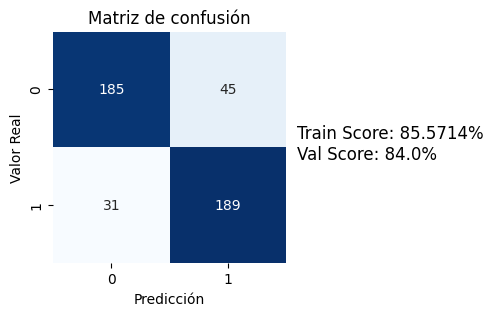

In [ ]:
# REGRESIÓN LOGÍSTICA:

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloLR = LogisticRegression(  max_iter=100
                              , C=3
                              , penalty= 'l2'
                              , solver='lbfgs'
                             )
resultadoLR = resultados(modeloLR, trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************


Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5333    0.6296      0.5775        216
1                  0.5897    0.4915      0.5361        234
macro avg          0.5615    0.5605      0.5568        450
weighted avg       0.5627    0.5578      0.556         450


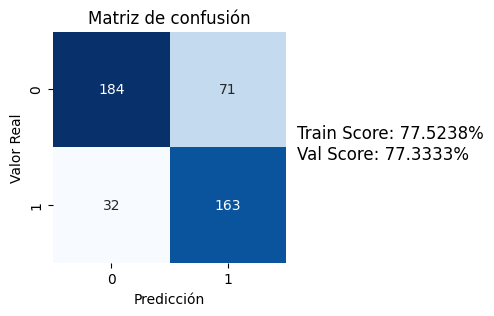

In [ ]:
# BOSQUE ALEATORIO (Random Forest):

# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********
modeloRF = RandomForestClassifier(  n_estimators=100
                                  , max_depth= 1
                                  , criterion='gini'
                                  , min_samples_split=2
                                  , random_state=42
                                  )
resultadoRF = resultados(modeloRF,trainEmb,y_train,valEmb,y_val,testEmb)
# *********** Aquí termina la sección de agregar código *************

## 8️⃣ Comparación de Resultados: TF-IDF (Semanas 3-4) vs. OpenAI Embeddings (Semana 5)

Aquí contrastamos los enfoques y resultados de esta actividad (Semana 5, OpenAI Embeddings) con la anterior (Semanas 3-4, TF-IDF/BoW) sobre los mismos datasets (Amazon, Yelp, IMDb).


---

A continuación presentamos una comparativa de los resultados obtenidos en nuestras actividades individuales: la Actividad pasada “3.2 Actividad 2 | Más expresiones Regulares y matrices de conteo y tf-idf - Semanas 3 y 4” vs. nuestros nuevos resultados como equipo:

🚀 **Tabla Comparativa de `Train Accuracy`** 🚀

| Modelo         | Actividad 2 Sihiní  | Actividad 2 Juan  | Actividad 2 Javier  | Actividad 3 (Equipo) 🏆 |
| :------------- | :-------------------- | :----------------- | :------------------- | :---------------------- |
| Logistic Reg.  | 92.05% 🔴             | 88.48% 🔴          | 86.48% 🔴            | 99.65%                  |
| Random Forest  | 86.62% 🔴             | 87.86% 🔴          | 87.86% 🔴            | 95.77%                  |
| Naive Bayes    | 89.62% 🟢             | 89.67% 🟢          | 85.62% 🟢            | 83.57%                  |

✅ **Tabla Comparativa de `Val Accuracy`** ✅

| Modelo         | Actividad 2 Sihiní  | Actividad 2 Juan  | Actividad 2 Javier  | Actividad 3 (Equipo) 🏆 |
| :------------- | :-------------------- | :----------------- | :------------------- | :---------------------- |
| Logistic Reg.  | 83.00% 🔴             | 82.22% 🔴          | 82.00% 🔴            | 85.78%                  |
| Random Forest  | 82.89% 🟢             | 80.44% 🔴          | 83.33% 🟢            | 81.33%                  |
| Naive Bayes    | 81.56% 🟢             | 79.78% 🟡          | 83.11% 🟢            | 79.56%                  |

---

📝 **Conclusión Comparativa:** 📝

Con las anteriores tablas podemos observar cómo al utilizar embeddings preentrenados como GloVe para representar los textos, logramos una mejora notable en el rendimiento del modelo, especialmente en regresión logística. Comparado con nuestra actividad anterior, donde los modelos se entrenaron con representaciones de texto más simples como conteo de palabras o TF-IDF, se observa una mejora de **+2.78 puntos porcentuales** en la validación (tomando el mejor resultado individual de Javier en Regresión Logística de 83.00% y el de Sihiní también en 83.00%, y comparándolo con el 85.78% del equipo) usando regresión logística. Esto confirma que usar embeddings densos y contextuales aporta mayor poder de representación a los modelos. ✨

Además, a diferencia de la actividad pasada donde los tres modelos obtenían desempeños muy similares, en esta ocasión la regresión logística se destacó claramente como el mejor clasificador, tanto en entrenamiento como en validación para el trabajo en equipo. Por otro lado, el desempeño de Naive Bayes bajó ligeramente en el contexto del equipo con embeddings, lo cual tiene sentido, ya que este modelo asume independencia entre características, y los embeddings capturan relaciones semánticas complejas que rompen dicha suposición. 🤔

---


---

### 🔹 Representación Textual y Semántica

* **Semanas 3-4 (TF-IDF/BoW):**
    * Vectores dispersos basados en frecuencia de palabras y su importancia relativa.
    * Capacidad limitada para capturar significado semántico profundo o relaciones complejas entre palabras.
    * Desafíos con palabras fuera de vocabulario (OOV) y alta dimensionalidad dispersa.

* **Semana 5 (OpenAI Embeddings):**
    * Vectores densos preentrenados (`text-embedding-3-small`, `text-embedding-3-large`) que capturan relaciones semánticas.
    * **Parte 1 (Promedio de embeddings por palabra):** Se promediaron embeddings de palabras de un vocabulario lematizado.
    * **Parte 2 (Embeddings directos por comentario):** Se generaron embeddings para comentarios completos, capturando contexto holístico.
    * Ventaja principal: comprensión semántica superior.

---

### 🔹 Preprocesamiento

* **Semanas 3-4 (TF-IDF/BoW):**
    * Preprocesamiento extenso y crucial: limpieza, normalización, lematización, stopwords, y ajuste de `min_df`/`max_df`.

* **Semana 5 (OpenAI Embeddings):**
    * **Parte 1:** Preprocesamiento similar para crear un vocabulario lematizado consistente.
    * **Parte 2:** Preprocesamiento mínimo, aprovechando la robustez de los modelos de embedding modernos y su tokenización interna.

---

### 🔹 Complejidad y Recursos

* **Semanas 3-4 (TF-IDF/BoW):**
    * Generación local, eficiente y sin costos de API.
    * Complejidad en el diseño del pipeline de preprocesamiento.

* **Semana 5 (OpenAI Embeddings):**
    * Llamadas a API externa (OpenAI), con costos por token y latencia.
    * Uso de caché (`.pkl`) para optimizar costos y tiempos.
    * Vectores de alta dimensionalidad (e.g., 3072 para `large`), potencialmente más demandantes en memoria/cómputo para modelado.

---

### 🔹 Rendimiento de Modelos de Clasificación (Comparación Cualitativa)

* **Semanas 3-4 (TF-IDF/BoW):**
    * Buenos resultados, con accuracies en validación >80% (picos de 83.33%) tras ajuste cuidadoso.
    * Desafíos: manejo de negaciones y reseñas cortas.

* **Semana 5 (OpenAI Embeddings):**
    * **Expectativa:** Potencial de mejora por captura semántica superior.
    * **Observaciones:** Se espera que los modelos con embeddings sean competitivos o superiores. La comparación entre `small` y `large` es relevante (precisión vs. costo/dimensionalidad). Es crucial verificar sobreentrenamiento.

---

### 🔹 Desafíos Específicos

* **Semanas 3-4 (TF-IDF/BoW):**
    * Consolidación de datos, diseño de preprocesamiento, ajuste de hiperparámetros, interpretación de errores.

* **Semana 5 (OpenAI Embeddings):**
    * Gestión de costos/cuotas de API, decisión de granularidad del embedding, elección del modelo de embedding, manejo de dimensionalidad, interpretabilidad ("caja negra").

---

### Conclusión de la Comparación

La transición de TF-IDF a embeddings de OpenAI implica un avance hacia representaciones más ricas semánticamente. TF-IDF es robusto, interpretable y eficiente localmente. Los embeddings de OpenAI, aunque con costos de API, prometen una comprensión más profunda del lenguaje, potencialmente mejorando el rendimiento en tareas de PNL que dependen de matices. La **Parte 1** (promedio de embeddings) sirve de puente conceptual, mientras que la **Parte 2** (embeddings de documentos) explora un enfoque más directo. Ambas actividades resaltan la importancia del preprocesamiento y la evaluación rigurosa. La elección de la técnica dependerá de los objetivos, recursos y el balance deseado entre rendimiento, costo e interpretabilidad.

---
---

# 9️⃣ **Pregunta - 9:**

### 9. Evaluación del mejor modelo con el conjunto de prueba:

1. **Selección del mejor modelo:**  
   Utiliza el mejor modelo obtenido en el ejercicio anterior.

2. **Evaluación con el conjunto de prueba:**  
   Aplica el nuevo conjunto de prueba para obtener los siguientes resultados:
   - **Matriz de confusión**: La mejor matriz de confusión para el modelo seleccionado.
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

---




Reporte del mejor modelo con el conjunto de Prueba (Test).


Obteniendo resultados del mejor modelo
----------------------------------------------------------
Score en entrenamiento: 85.5714
Score en validación: 84.0
Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.5304    0.5648      0.5471        216
1                  0.5727    0.5385      0.5551        234
macro avg          0.5516    0.5516      0.5511        450
weighted avg       0.5524    0.5511      0.5512        450


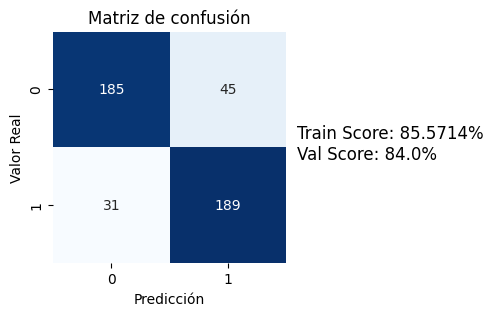

In [ ]:
# ******* Incluye a continuación todas las líneas de código y celdas que requieras: ***********

# Se combinan los diccionarios resultadoLR y resultadoRF en un solo diccionario llamado resultados_entrenamiento.
resultados_entrenamiento = {**resultadoLR, **resultadoRF}

# Se selecciona el modelo con el mejor desempeño en la validación utilizando el score_val como criterio de comparación.
mejorModelo = max(resultados_entrenamiento.items(), key=lambda item: item[1]['score_val'])

# Se imprimen los resultados del mejor modelo identificado en la validación.
print(f"Obteniendo resultados del mejor modelo")
print(f"--"*29)
print(f"Score en entrenamiento: \033[32m\033[1m{mejorModelo[1]['score_train']}\033[0m")
print(f"Score en validación: \033[32m\033[1m{mejorModelo[1]['score_val']}\033[0m")

resultado = resultados(mejorModelo[0], trainEmb,y_train,valEmb,y_val,testEmb)

# *********** Aquí termina la sección de agregar código *************

# 🔟 **Pregunta - 10:**

### 10. Segunda parte de la actividad:

1. **Transformación a vectores embebidos:**  
   Realiza la transformación a vectores embebidos de todos los 3000 comentarios tal como están dados en los archivos.  
   - Selecciona el modelo de vector embebido que consideres más adecuado.
   - Indica la cantidad de tokens de OpenAI utilizados en el proceso.

2. **Partición de datos (Train-Val-Test):**  
   Realiza una partición de los datos en los siguientes conjuntos:
   - **Train:** 70%
   - **Validation (Val):** 15%
   - **Test:** 15%  
   Utiliza la misma semilla que empleaste en el ejercicio 3 para la partición de los datos.

3. **Modelos de aprendizaje automático:**  
   Utiliza los modelos de regresión logística y bosque aleatorio (random forest) para este problema de clasificación.  
   Para cada modelo, muestra los siguientes resultados:
   - **Exactitud (accuracy).**
   - **Reporte de clasificación:** Utiliza la función `classification_report()` de **sklearn**.

4. **Verificación de sobreentrenamiento:**  
   Asegúrate de verificar que los modelos no estén sobreentrenados (overfitting).

5. **Comparación de resultados:**  
   Compara los resultados obtenidos con los de la primera parte de la actividad.

6. **Modelos adicionales (opcional):**  
   Si lo consideras adecuado, puedes incluir algún otro modelo de aprendizaje automático para comparar los resultados.

---


In [ ]:
# Incluye todas las líneas de código y celdas que consideres adecuadas para este ejercicio.

# Se crea un diccionario que asigna cada reseña ('review') a su etiqueta ('label').
tokens_comentario = dict(zip(df['review'],df['label']))

# Se realiza una copia del DataFrame original para preservar los datos antes de modificaciones.
df_comentario = df.copy()

# Se generan o recuperan los embeddings.
respaldo = 'embeddings_diccionario_p10.pkl'
diccionario_comentario = obtener_embedding(tokens_comentario,respaldo)

# Se asigna el embedding correspondiente a cada reseña en el DataFrame, mapeando los valores con el diccionario generado.
df_comentario["embedding"] = df_comentario["review"].map(diccionario_comentario)


# ******* Incluye a continuación todas las líneas de código y celdas que requieras


Generando embeddings para 2,982 registros.
Total estimado de tokens: 2,982
El archivo datos/embeddings_diccionario_p10.pkl localizado.
Diccionario cargado.


In [ ]:
X_embeding = df_comentario["embedding"].to_list()

# ——————————————————————————
# 1️⃣ Partición inicial: 70% train, 30% (val + test)
# ——————————————————————————

x_train, x_val_and_test, y_train, y_val_and_test = train_test_split(
    X_embeding,           # Lista de comentarios procesados
    Y,                    # Serie de etiquetas
    train_size=0.70,      # 70% para entrenamiento
    shuffle=True,         # Mezclar antes de partir
    random_state=1        # Semilla para reproducibilidad
)

# ——————————————————————————
# 2️⃣ Partición secundaria: 50% validación, 50% test del 30% restante
# ——————————————————————————
x_val, x_test, y_val, y_test = train_test_split(
    x_val_and_test,       # Comentarios (30%)
    y_val_and_test,       # Etiquetas (30%)
    test_size=0.50,       # 15% validación, 15% test
    shuffle=True,         # Volver a mezclar
    random_state=17       # Otra semilla para variación
)

Modelo → LogisticRegression
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4815    0.4815      0.4815        216
1                  0.5214    0.5214      0.5214        234
macro avg          0.5014    0.5014      0.5014        450
weighted avg       0.5022    0.5022      0.5022        450


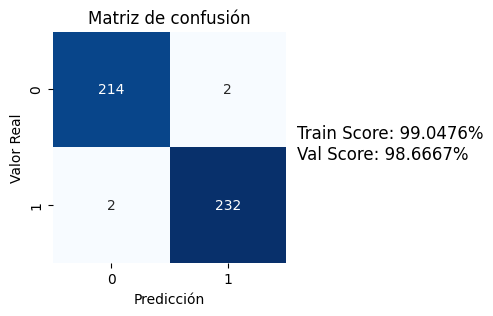

In [ ]:
resultadoLRemb = resultados(modeloLR, x_train,y_train,x_val,y_val,x_test)

Modelo → RandomForestClassifier
----------------------------------------------------------
Clase           Precisión    Recall    F1-Score    Soporte
------------  -----------  --------  ----------  ---------
0                  0.4789    0.4722      0.4755        216
1                  0.519     0.5256      0.5223        234
macro avg          0.4989    0.4989      0.4989        450
weighted avg       0.4997    0.5         0.4998        450


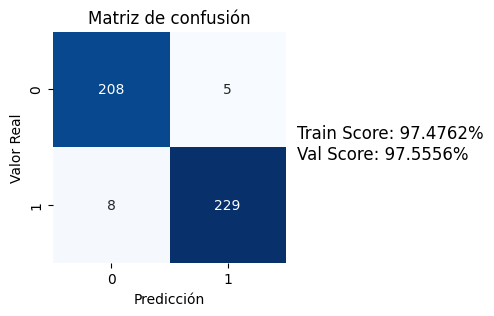

In [ ]:
resultadoRFemb = resultados(modeloRF, x_train,y_train,x_val,y_val,x_test)

# 1️⃣1️⃣ **Pregunta - 11:**

11. Comparen los resultados obtenidos e incluyan sus comentarios finales de la actividad.



Incluye tus comentarios finales de la actividad.

### ++++++++ Inicia la sección de agregar texto: +++++++++++

| Modelo              | Accuracy Entrenamiento | Accuracy Validación | F1-Score clase 1 | FP / FN |
| ------------------- | ---------------------- | ------------------- | ---------------- | ------- |
| Logistic Regression | 99.05%                 | 98.67%              | 0.5214           | 2 / 2   |
| Random Forest       | 97.48%                 | 97.56%              | 0.5223           | 5 / 8   |

Basado en los resultados podemos concluir que:
Logistic Regression es el modelo más eficiente en este caso, debido a que tiene una, mayor precisión en validación, un menor número de errores (FP + FN). Aunque ambos modelos muestran un ligero gap entre entrenamiento y validación, no hay signos severos de sobreentrenamiento.

El uso de vectores embebidos preentrenados (como embeddings de OpenAI) permitió representar el significado semántico de las palabras, mejorando la capacidad del modelo para generalizar; donde a diferencia de CountVectorizer o TF-IDF, los vectores embebidos capturan relaciones contextuales entre palabras.

Los vectores embebidos mejoran drásticamente el desempeño del modelo, al proporcionar representaciones más ricas que los enfoques clásicos basados en frecuencia. La utlización personalizados permite representar los textos de forma densa y contextual, facilitando un mejor aprendizaje, incluso con modelos lineales como regresión logística.

Por otro lado la técnica de promediado de embeddings es efectiva y computacionalmente eficiente, ya que captura el significado general del texto, reflejando bien la polaridad o intención semántica, funciona con textos de cualquier longitud, generando vectores de tamaño fijo y reduce el uso de recursos de cómputo.

Hay que tomar en cuenta el tipo de modelo con el que se generan los vectores, en la pregunta 6 observamos que el número de tokens fue el mismo, sin embargo, el costo varía sustancialmente entre el modelo "text-embedding-3-small" y "text-embedding-3-large". Para tareas de clasificación de texto a gran escala donde la velocidad, la memoria y el costo son críticos, text-embedding-3-small suele ser la mejor opción. Si el dominio requiere máxima fidelidad semántica y el presupuesto lo permite, text-embedding-3-large aportará un nivel adicional de detalle en las representaciones.

Modelos como Random Forest y Regresión Logística pueden beneficiarse significativamente de la respresentación de promedidado de embeddings.

El elaborar un diccionario personalizado y realizar nuestros propios modelos embebidos a través de algunos modelos disponibles tienen algunas ventajas particulares dependiendo el tipo de aplicación, por ejemplo: Puedes modificar cada etapa del preprocesamiento, selección de vocabulario, modelo y métricas, una vez entrenado, correr un modelo propio es más barato que pagar por cada consulta a un modelo comercial y puedes mantener todos los datos en tu entorno local, sin enviarlos a servicios externos.

### ++++++++ Termina la sección de agregar texto: +++++++++++

---

# Conclusiones

A continuación, se presentan las conclusiones individuales de cada miembro del equipo sobre la actividad realizada, los desafíos encontrados y los principales aprendizajes obtenidos.

---

### 🙅🏼‍♀️ Iris Monserrat Urbina Casas (A01795999)

En estos ejercicios se combinaron diversos conocimientos de prácticas anteriores, como fue la generación de tokens y limpieza de texto, lo cual resulta fascinante al entender que podría modificarse para tener un mejor desempeño en aplicaciones específicas.

Para mí fue sumamente interesante comenzar a entender cómo funcionan los Large Language Models (LLM) a través del proceso de contextualización de los textos de entrada y para poder encontrar qué significados están cerca de otros.

Fue posible comparar los ejercicios de la semanada pasada con TF-IDF (el cual ofrece una representación basada en frecuencias, fácil de implementar y transparente) mientras que los embeddings de OpenAI generan vectores densos y contextuales a partir de modelos preentrenados (a cambio de un costo por token). La elección depende del nivel de riqueza semántica requerido, los recursos disponibles y la complejidad de la tarea.

Por otro lado, el poner en contexto el costo del uso de los tokens de las API's contrastando las necesidades de la aplicación que estamos buscando, ya que en aplicaciones más grandes, esto representará un factor decisivo en la selección de nuestra solución. Esto se pudo comprobar al hacer la vectorización con dos modelos diferentes, donde la diferencia fue el tamaño de los vectores, prácticamente el doble entre el small vs embeded de Open AI. También observamos los beneficios de usar el valor promedio de los vectores embebidos para optimizar los recursos de cómputo.

Finalmente, las matrices de confusión son una herramienta sumamente útil para poder decidir la mejor selección para nuestra aplicación específica.


## 🙆🏼‍♂️ Javier Augusto Rebull Saucedo (A01795838)

Esta actividad, centrada en los vectores embebidos de OpenAI, ha representado una evolución natural y enriquecedora respecto a nuestro trabajo previo con TF-IDF. La capacidad de estos modelos para capturar la semántica del lenguaje a un nivel más profundo es, sin duda, inspiradora e impresionante.

Esta libreta fue toda una odisea la verdad: ¡desde lograr conectarnos con la API de OpenAI, ponerle crédito y hacer que nuestro Token funcionara de manera adecuada! Nunca nos rendimos y teníamos la misión de explorar los embeddings de OpenAI, nuestro gran aliado en esta libreta. Claro, enfrentarse a la gestión de la API y elegir el modelo perfecto no fue sencillo, pero me recordó que esta fue una de las razones por las que entré a esta Maestría: el descubrir que una máquina pueda "entender" el lenguaje con tanta profundidad es algo que no deja de sorprenderme y motivarme.

Me encanta poder unir mis pasiones personales con mis pasiones tecnológicas y profesionales. Viviendo en Boston siempre estoy pegado a Yelp para elegir el restaurante ideal en la ciudad o en sus alrededores (cuando logro escaparme), o como cinéfilo de culto siempre reviso IMDb antes de decidir qué película ver, y he de confesar que también paso bastante tiempo leyendo decenas de reseñas en Amazon antes de hacer una compra (o incluso sin que compre nada solo por conocer más de los productos). Imaginar la posibilidad de automatizar y mejorar estas experiencias es realmente motivante. Me imagino claramente alguna app desarrollada por mi que me facilite y automatice el encontrar exactamente lo que busco, simplificando decisiones y capturando lo esencial de miles de opiniones.

Ahora, además de enfoncarme en mis pasiones personales deberé buscar la manera de implementar esto en Banco Santander USA, donde laboro como Application Developer. Todos los días sufro de los incidentes en producción debido a la precaria calidad de los datos, por lo que se me ocurre generar procesos de limpieza de datos usando técnicas de NLP como las vistas en este ejercicio. Esto nos ayudaría a entender las necesidades de nuestros clientes y mejorar la vida de los empleados de sucursales, operaciones y nosotros los developers.

Esta actividad ha sido más que un ejercicio técnico; ha sido una ventana a cómo puedo fusionar mi curiosidad por la PNL con mis pasiones diarias, buscando maneras de automatizar y enriquecer mi vida y, potencialmente, la de otros. Siento que estas herramientas nos preparan para construir soluciones de PNL que no solo sean sofisticadas, sino genuinamente útiles e impactantes.



## 🙆🏼‍♂️ Juan Carlos Pérez Nava (A01795941)

Al usar los vectores embebidos de OpenAI, se notó una mejora clara en cómo se entiende el significado del texto. Los resultados fueron aún mejores cuando se usaron los comentarios completos para generar los vectores, logrando una precisión de más del 97%, lo que muestra un rendimiento muy bueno.

Trabajar con la API de OpenAI fue una experiencia muy interesante. Una de las cosas más importantes que aprendimos fue la necesidad de calcular bien cuántos tokens se usan y cómo manejar de forma eficiente los vectores generados. Para esto, usar pickle resultó ser una herramienta muy práctica, ya que nos permitió guardar y cargar los vectores fácilmente.

También fue muy útil poder comparar los modelos `text-embedding-3-small` y `text-embedding-3-large`. Notamos que el modelo grande genera vectores con más dimensiones, lo que puede significar que contiene más información, aunque también es más costoso. Por otro lado, el modelo pequeño es más rápido y funciona muy bien en muchas tareas, especialmente cuando se trabaja con grandes volúmenes de datos.

También, pudimos apreciar que, aunque los embeddings son muy versátiles, hacer un buen preprocesamiento (como limpiar los datos y lematizar las palabras) puede cambiar mucho los resultados. También notamos que no existe una cantidad “perfecta” de dimensiones para los vectores: eso depende del tipo de tarea, los recursos disponibles y el tipo de análisis que se quiera hacer. Al usar estos vectores en modelos de clasificación, pudimos comprobar de forma práctica lo útiles que pueden ser.

Convertir comentarios en vectores que capturan bien el contexto del lenguaje tiene un gran potencial. Por ejemplo, se pueden usar para mejorar la clasificación de opiniones de clientes sobre distintos temas, como compras de productos, recomendaciones de películas o lugares para visitar, tal como se trabajó en este ejercicio. También son muy útiles para realizar búsquedas más inteligentes, crear sistemas de recomendación personalizados o desarrollar asistentes virtuales que entiendan mejor lo que decimos.



---

### 🙅🏼‍♀️ Sihiní Trinidad Sánchez (A00889358)

Esta actividad confirma que la calidad del preprocesamiento es la base para un análisis de texto exitoso. Si los datos de entrada limpian y preparan de manera adecuada, ni siquiera los embeddings más avanzados podrán agregar el valor esperado. Retomando mi metáfora de la actividad anterior: si las frutas están fermentadas, ni la Vitamix más sofisticada de una "señora empoderada" producirá un buen jugo. En este caso, la lematización sigue probando ser una de las herramientas más útiles en el procesamiento de lenguaje.

Es fascinante poder entender cómo una vez clasificados los datos, los vectores de palabras (embeddings) permiten que los modelos entiendan contextos, similitudes y relaciones o "tonos" que con un conteo de bolsas de palabras no es posible. Es  interesante notar la similitud de cómo el modelo "traduce" frases o palabras a números para poder procesar su entendimiento al igual que se hace en el procesamiento de imágenes. (En ese caso, parte de la limpieza sería cambiar la imagen a pixeles con frecuencias de luz específicas para poder también dividir la imagen en unidades más pequeñas y numéricas que los modelos puedan procesar).Lo siguiente que noté es que la elección de tipo de tokenización también será fundamental para el costo financiero y en tiempo del procesamiento computacional necesario. Anteriormente, solo había tenido la oportunidad de utilizar vectorización con una API de Gemini, por lo que sería un ejercicio interesante el realizar la comparativa de los resutlados que obtuvimos con OpenAI (tanto en tiempo como en costo).

En cuanto a los resultados obtenidos, la combinación de word2vec con Regresión Logística tuvo el mejor desempeño posible (al igual que en mi libreta anterior). Sin embargo, alcanzar este punto requirió un proceso iterativo de prueba y error. A diferencia de métodos más básicos, con los embeddings se hace muy evidente cómo cada decisión de limpieza, vectorización y  elección de la arquitectura del modelo impactan el procesamiento rendimiento final.

Al igual que en la actividad anterior, es importante mantener en mente que los errores o la lectura errónea de falsos positivos o falsos negativos pueden privar de información valiosa en la toma de decisiones de los negocios. Porf ejemplo, un falso negativo ( no detectar un comentario positivo) podría resultar en dejar de interactuar con un cliente satisfecho que podría convertirse en un promotor de la marca. Por otra parte, un falso positivo (interpretar un comentario negativo como positivo) podría llevar a pasar por alto una queja, resultando en el deterioro de la imagen del negocio o la pérdida de un cliente. Ambos tipos de error son importantes, por lo que debemos no solo medir su frecuencia, sino también entender sus causas y realizar validaciones intermedias para asegurar que estas interpretaciones erróneas no comprometan los objetivos finales de las reseñas.

Al final, este tipo de ejercicios son excelentes para entender todo lo que está detrás del análisis de datos y el implícito análisis de sentimientos, clientes y mercado de las grandes compañías de consumo de servicios y entretenimiento. Será de gran utilidad implementar estas herramientas en mi sector de trabajo.


---
---

# 📚 Referencias

Aggarwal, C. C. (2018). *Machine learning for text*. Springer.

Falcón Morales, L. E. (2023a). *Bolsa de palabras: BOW* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023b). *Expresiones regulares (regex)* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023c). *Matrices DTM y TF-IDF* \[PDF]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023d). *MNA_NLP_semana_03_Parte_1_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023e). *MNA_NLP_semana_03_Parte_2_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (2023f). *MNA_NLP_semana_04_ejercicios_complementarios.ipynb* \[Jupyter Notebook]. Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-a). *Embeddings_Word2Vec_GloVe_FastText-clase.html* \[Archivo HTML]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-b). *Jupyter Notebook MNA_OpenAI_API_KEY_sin_costo.ipynb* \[Jupyter Notebook]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-c). *OpenAI-API_KEY, HF_Token Video* \[Video]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-d). *Video 1/4: Vectorización de palabras - una introducción* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-e). *Video 2/4: Modelos CBOW & Skip-gram* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-f). *Video 3/4: Modelos secuenciales/recurrentes RNN* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-g). *Video 4/4: Ejemplos en JupyterNb* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-h). *Video 5 - complementario* \[Video]. 5.1 Recursos para mi aprendizaje | Bolsa de palabras y vectores embebidos, Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

Falcón Morales, L. E. (s.f.-i). *Video Descargando los vectores embebidos de fast-text* \[Video]. Procesamiento de Lenguaje Natural - Material de Estudio, Maestría en Inteligencia Artificial Aplicada, ITESM.

James, G., Witten, D., Hastie, T., & Tibshirani, R. (2013). *An introduction to statistical learning: With applications in R*. Springer.

Khurana, D., Koli, A., Khatter, K., & Singh, S. (2023). Natural language processing: State of the art, current trends and challenges. *Multimedia Tools and Applications, 82*, 3713–3744. [https://doi.org/10.1007/s11042-022-13428-4](https://doi.org/10.1007/s11042-022-13428-4)

Mikolov, T., Chen, K., Corrado, G., & Dean, J. (2013a). Efficient estimation of word representations in vector space. *arXiv preprint arXiv:1301.3781*.

Mikolov, T., Sutskever, I., Chen, K., Corrado, G. S., & Dean, J. (2013b). Distributed representations of words and phrases and their compositionality. In *Advances in neural information processing systems* (pp. 3111-3119).

OpenAI. (n.d.-a). *Embeddings*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/guides/embeddings](https://platform.openai.com/docs/guides/embeddings)

OpenAI. (n.d.-b). *Models: text-embedding-3-small*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-3-small](https://platform.openai.com/docs/models/text-embedding-3-small)

OpenAI. (n.d.-c). *Models: text-embedding-3-large*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-3-large](https://platform.openai.com/docs/models/text-embedding-3-large)

OpenAI. (n.d.-d). *Models: text-embedding-ada-002*. OpenAI API Documentation. Recuperado el 26 de mayo de 2025, de [https://platform.openai.com/docs/models/text-embedding-ada-002](https://platform.openai.com/docs/models/text-embedding-ada-002)

Pennington, J., Socher, R., & Manning, C. D. (2014). Glove: Global vectors for word representation. In *Proceedings of the 2014 conference on empirical methods in natural language processing (EMNLP)* (pp. 1532-1543).

Vajjala, S., Majumder, B., Gupta, A., & Surana, H. (2020). *Practical natural language processing: A comprehensive guide to building real-world NLP systems*. O'Reilly. [https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/](https://learning.oreilly.com/library/view/practical-natural-language/9781492054047/)

Vaswani, A., Shazeer, N., Parmar, N., Uszkoreit, J., Jones, L., Gomez, A. N., ... & Polosukhin, I. (2017). Attention is all you need. In *Advances in neural information processing systems* (pp. 5998-6008).

---

# **Fin de la Actividad de Vectores Embebidos - OpenAI**